<a href="https://colab.research.google.com/github/SaiVamshiKatkuri/Digit-Recognition/blob/main/Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic**: `Digits Classification on MNIST dataset`

[Link to download the Dataset](https://www.kaggle.com/shrutimechlearn/churn-modelling?select=Churn_Modelling.csv)



**AUTHOR**: Sai Vamshi Katkuri
[Github Repository](https://github.com/SaiVamshiKatkuri/Digit-Recognition)

**Reach out** :[Email](https://mail.google.com/mail/u/0/?tab=rm&ogbl#inbox) | [Linkedin](https://www.linkedin.com/in/katkuri-sai-vamshi-2209281a8/) | [Github](https://github.com/SaiVamshiKatkuri)

*Multiclass classification* using `CNN` 

**Description**: The dataset contains `70000` images of ten different digits.Each digit contains around `7000` images for itself. The goal is to predict the digit based on the image given.



#### Importing the necessary libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns


#### Loading the dataset 

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

#### Visualizing the images

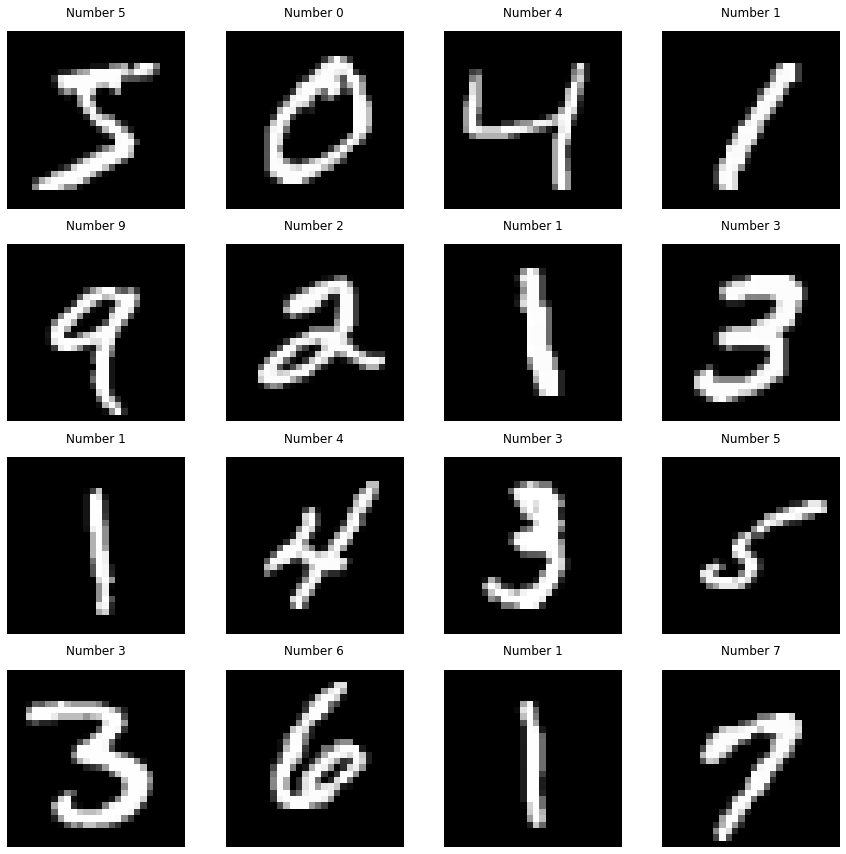

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(4, 4, figsize = (15, 15))
plt.gray()
print(axs.flat)
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
fig.show()



#### Reshaping the images to 4th dimension(batch_size)

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


## Normalizing the image pixels

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


##BUILDING THE MODEL 
### Working

<img src="https://www.researchgate.net/profile/Chaudhary-Aqdus/publication/334639839/figure/fig4/AS:799323273048073@1567584927323/Convolution-Neural-Network-CNN-working-paradigm-with-input-convolution-pooling-layers.ppm"  >

#### Kernel
<img src="https://miro.medium.com/max/1010/1*jIv2CLxdXsxvx60Urc11Tw.png" >

#### Max Pooling
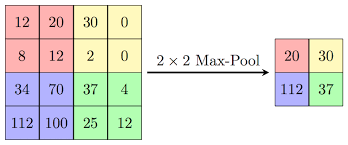

#### Categorical cross entropy 
This is actually a combination of cross entropy loss and softmax loss
<img src="https://gombru.github.io/assets/cross_entropy_loss/softmax_CE_pipeline.png" height="250px" width="650px" >


#### Importing the model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

### Code to train the model with different optmisers

In [7]:
## Function starts here
def train_Model(optimizer):
  model = Sequential()
  model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten()) 
  model.add(Dense(128, activation=tf.nn.relu))
  model.add(Dropout(0.2))
  model.add(Dense(10,activation=tf.nn.softmax))
  model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])  
  history= model.fit(x=x_train,y=y_train, epochs=10)
  return model,history

### Code to plot accuracy and loss graphs

In [8]:
# Let's plot graphs using this function
def curvePlots(tempString,history):
  plt.figure(figsize=(15, 5))
  font = {'family': 'serif',
        'color':  'cornflowerblue',
        'weight': 'normal',
        'size': 16,
        }
  plt.grid(True)
  plt.plot(history.history[tempString],c="darkred")
  plt.xlabel('NumEpochs',fontdict=font)
  plt.ylabel(tempString,fontdict=font)
  plt.legend([tempString, tempString])
  plt.title(tempString,fontdict=font)
  plt.show()

### Training the model using RMSprop optimizer

In [9]:
model1,history_RMSprop=train_Model("RMSprop")    ## Calling the function
print(model1.summary())                          ## Model summary
print(history_RMSprop)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2134 - accuracy: 0.9356
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0847 - accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0626 - accuracy: 0.9820
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0511 - accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0437 - accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0361 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0330 - accuracy: 0.9899
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0302 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0256 - accuracy: 0.9920
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.024

In [10]:
 model1.evaluate(x_test, y_test)           ## Evaluation on test sets

313/313 [==============================] - 1s 2ms/step - loss: 0.0797 - accuracy: 0.9845


[0.07972482591867447, 0.984499990940094]

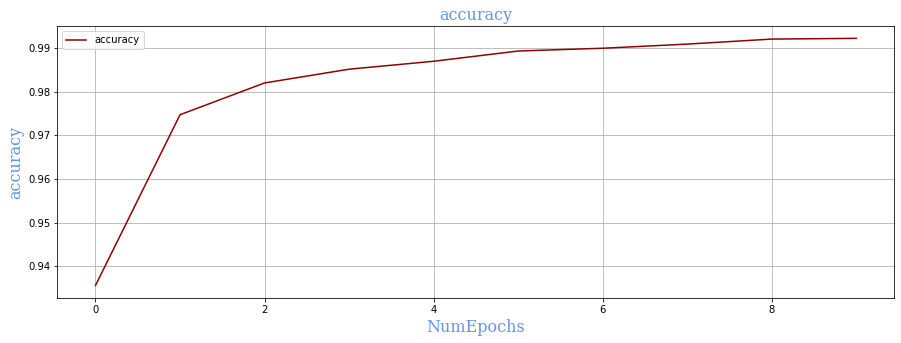

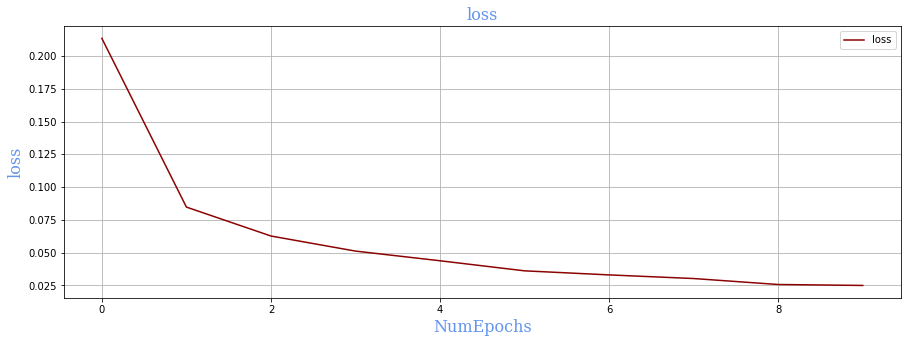

In [11]:
curvePlots("accuracy",history_RMSprop)     ## Calling function to plot graphs
curvePlots("loss",history_RMSprop) 

In [12]:
pred=model1.predict(np.expand_dims(x_test[3000],axis=0))     ## Prediction on a single image
print(pred.argmax())
print(y_test[3000])


6
6


*Creating a dataframe to hold predictions*

In [13]:
sample_df = pd.DataFrame()
sample_df["True_Values"]=y_test

In [14]:
y_pred = model1.predict(x_test)
y_result = np.argmax(y_pred, axis=1)  
sample_df['RMSprop'] = y_result

**With Adam Optimizer**

In [15]:
model2,history_Adam=train_Model("adam")       ## Calling the function
print(model2.summary())                       ## Summary of the model
print(history_Adam)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2103 - accuracy: 0.9369
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0859 - accuracy: 0.9737
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0594 - accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0430 - accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0338 - accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0294 - accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0246 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0213 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0187 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.017

In [16]:
 model2.evaluate(x_test, y_test)            ## Evaluating on test sets

313/313 [==============================] - 1s 2ms/step - loss: 0.0651 - accuracy: 0.9841


[0.06513198465108871, 0.9840999841690063]

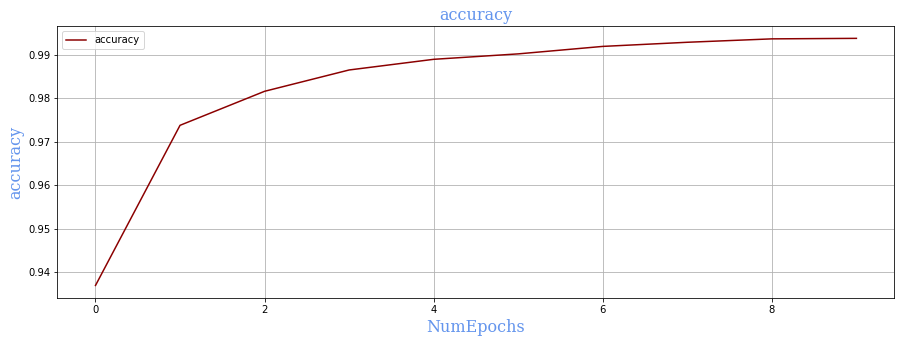

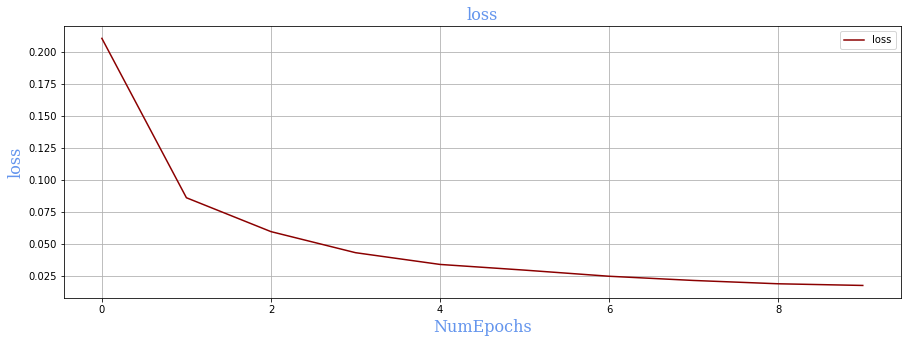

In [17]:
curvePlots("accuracy",history_Adam)          ## Calling functions to plot graphs
curvePlots("loss",history_Adam)

In [18]:
pred=model1.predict(np.expand_dims(x_test[3000],axis=0))     ## prediction on a single image
print(pred.argmax())
print(y_test[3000])


6
6


*Predictions of `x_test` using adam*

In [19]:
y_pred_adam = model2.predict(x_test)
y_result_adam = np.argmax(y_pred_adam, axis=1)  
sample_df['adam'] = y_result_adam


In [20]:
print(sample_df.shape)

(10000, 3)


## Saving the predictions to csv file

In [21]:
sample_df.to_csv('submission.csv',index=True)

**Thank You ❤**